In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
data_path = "../data/weather_notification_CE_2010-01-01_2023-10-21.csv"

df = pd.read_csv(data_path,index_col=[0]).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425240 entries, 0 to 1425239
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   uf              1425240 non-null  object 
 1   geocodigo       1425240 non-null  int64  
 2   nome_municipio  1425240 non-null  object 
 3   dt_notific      1425240 non-null  object 
 4   se_notif        1425240 non-null  int64  
 5   ano_notif       1425240 non-null  int64  
 6   temp_med        1425240 non-null  float64
 7   precip_med      1425240 non-null  float64
 8   pressao_med     1425240 non-null  float64
 9   umid_med        1425240 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 108.7+ MB


In [3]:
df.head()

uf  geocodigo nome_municipio  dt_notific  se_notif  ano_notif  \
0  Ceará    2309805         Pacoti  2020-03-31        14       2020   
1  Ceará    2310852    Pindoretama  2020-04-13        16       2020   
2  Ceará    2304400      Fortaleza  2020-07-02        27       2020   
3  Ceará    2304400      Fortaleza  2020-07-02        27       2020   
4  Ceará    2311801         Russas  2020-08-13        33       2020   

    temp_med  precip_med  pressao_med   umid_med  
0  25.879807    0.364901     0.996453  88.508120  
1  27.737236    0.068862     0.997939  81.584460  
2  26.324260    0.020131     0.999316  79.740380  
3  26.324260    0.020131     0.999316  79.740380  
4  27.482380    0.000000     0.999362  61.788048

In [4]:
# Selecionar as colunas relevantes do DataFrame original
cols = ['uf', 'geocodigo', 'nome_municipio', 'dt_notific', 'se_notif', 'ano_notif', 'precip_med', 'pressao_med', 'temp_med', 'umid_med']

# Agrupar os dados e calcular estatísticas
df_combined = df[cols] \
    .groupby(['uf', 'nome_municipio', 'geocodigo', 'ano_notif', 'se_notif']) \
    .agg(casos_notif=('dt_notific', 'count'),
         precip_med=('precip_med', 'mean'),
         pressao_med=('pressao_med', 'mean'),
         temp_med=('temp_med', 'mean'),
         umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])

# Imprimir o número total de registros e mostrar as primeiras linhas do DataFrame
print('Total de registros: ', len(df_combined), '\n')
print(df_combined.head())

Total de registros:  62669 

          uf nome_municipio  geocodigo  ano_notif  se_notif  casos_notif  \
3679   Ceará        Aracati    2301109       2023        40            1   
6753   Ceará       Barbalha    2301901       2023        40            2   
8712   Ceará       Beberibe    2302206       2023        40            2   
10231  Ceará    Brejo Santo    2302503       2023        40            1   
13079  Ceará         Cariús    2303303       2023        40            4   

       precip_med  pressao_med   temp_med   umid_med  
3679     0.000680     0.998354  27.781410  70.681980  
6753     0.000000     0.998879  27.557560  40.220620  
8712     0.019267     0.998394  27.246143  75.651260  
10231    0.000000     0.998408  29.353947  38.310005  
13079    0.000093     0.998395  29.976482  47.771520  


# Análise Exploratória dos Dados

- Investigar as relações entre casos de dengue, temperatura e umidade ao longo do tempo.

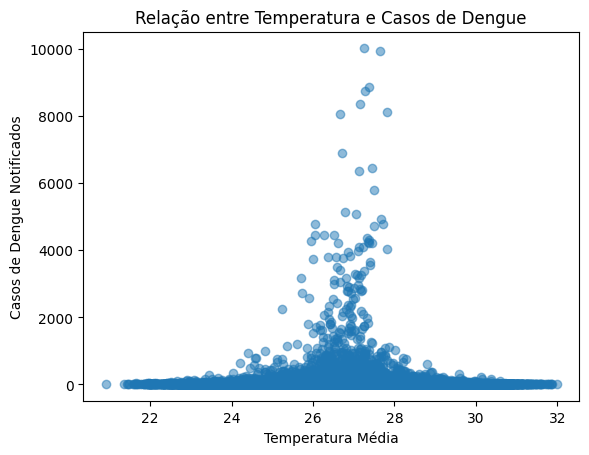

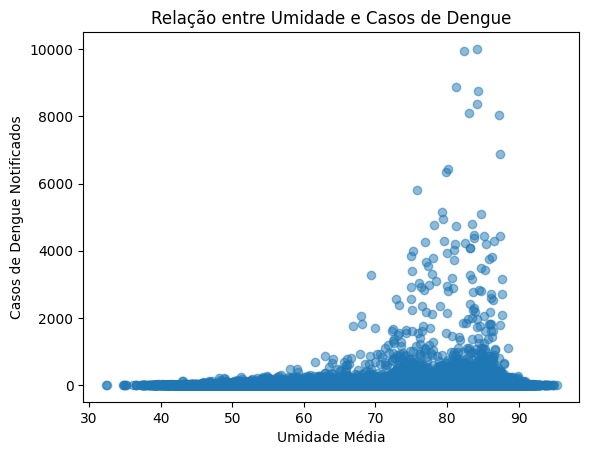

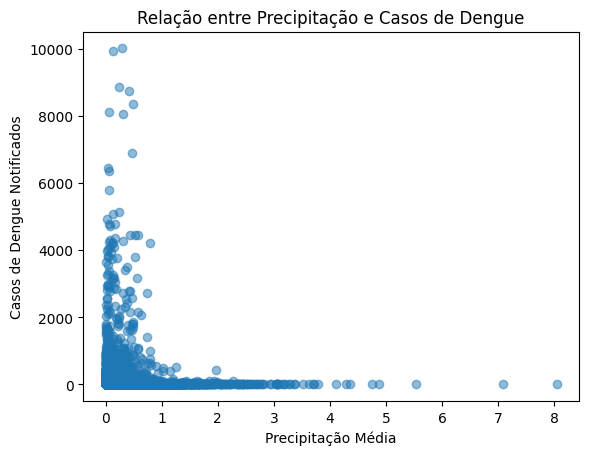

In [5]:
# Análise exploratória dos dados
plt.scatter(df_combined['temp_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Temperatura Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Temperatura e Casos de Dengue')
plt.show()

plt.scatter(df_combined['umid_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Umidade Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Umidade e Casos de Dengue')
plt.show()

plt.scatter(df_combined['precip_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Precipitação Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Precipitação e Casos de Dengue')
plt.show()


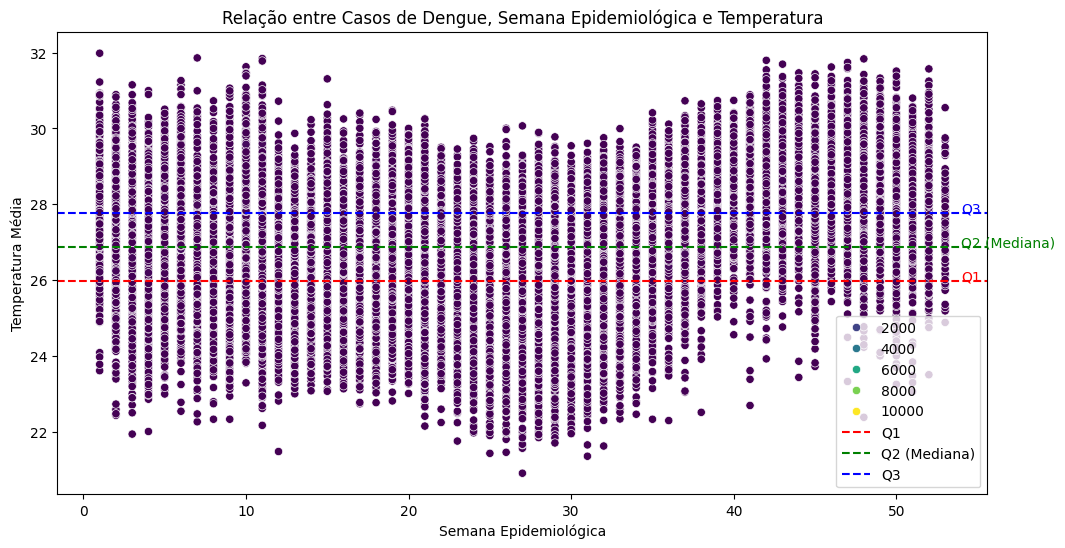

In [6]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
       x='se_notif', 
       y='temp_med', 
       hue='casos_notif', 
       palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['temp_med'].quantile(0.25)
Q3 = df_combined['temp_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Temperatura Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Temperatura')
plt.legend()
plt.show()


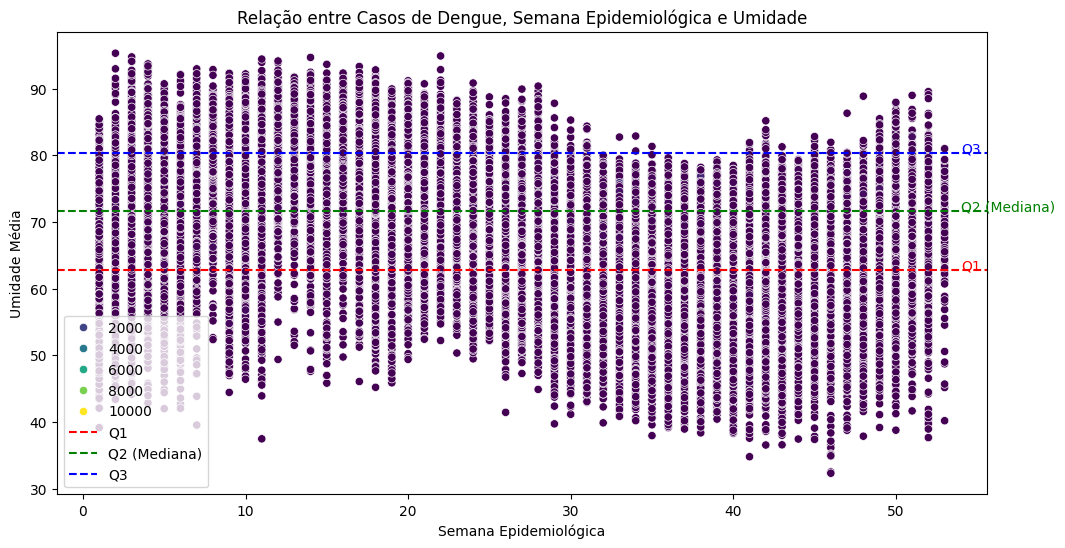

In [7]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
    x='se_notif', 
    y='umid_med', 
    hue='casos_notif', 
    palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['umid_med'].quantile(0.25)
Q3 = df_combined['umid_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Umidade')
plt.legend()
plt.show()


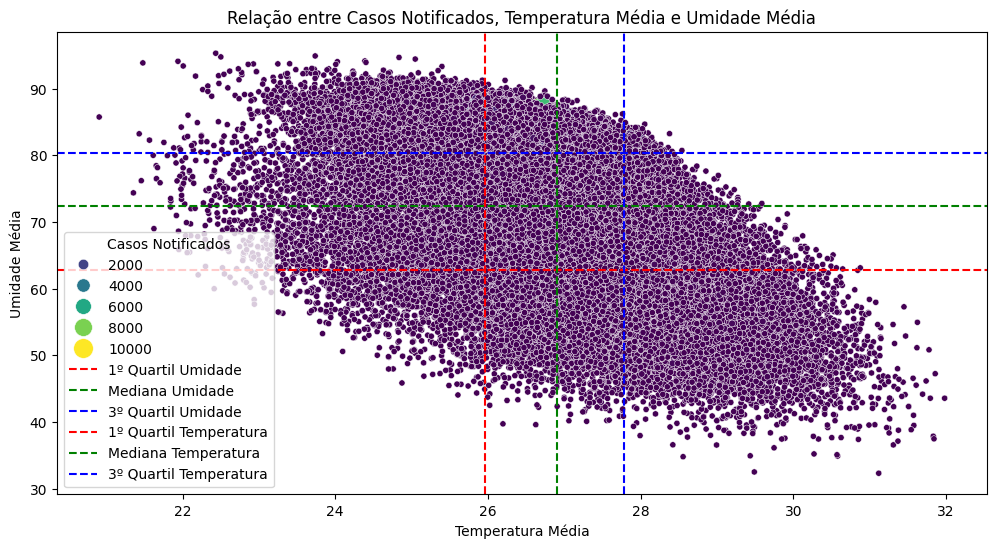

In [8]:
# Criar um gráfico de dispersão com cores representando os casos notificados
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_med', y='umid_med', hue='casos_notif', data=df_combined, palette='viridis', size='casos_notif', sizes=(20, 200))
plt.xlabel('Temperatura Média')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos Notificados, Temperatura Média e Umidade Média')

# Calcular e traçar quartis e medianas para os eixos x e y
quartis_temp = np.percentile(df_combined['temp_med'], [25, 50, 75])
quartis_umid = np.percentile(df_combined['umid_med'], [25, 50, 75])

plt.axhline(quartis_umid[0], color='r', linestyle='--', label='1º Quartil Umidade')
plt.axhline(quartis_umid[1], color='g', linestyle='--', label='Mediana Umidade')
plt.axhline(quartis_umid[2], color='b', linestyle='--', label='3º Quartil Umidade')

plt.axvline(quartis_temp[0], color='r', linestyle='--', label='1º Quartil Temperatura')
plt.axvline(quartis_temp[1], color='g', linestyle='--', label='Mediana Temperatura')
plt.axvline(quartis_temp[2], color='b', linestyle='--', label='3º Quartil Temperatura')

plt.legend(title='Casos Notificados')
plt.show()


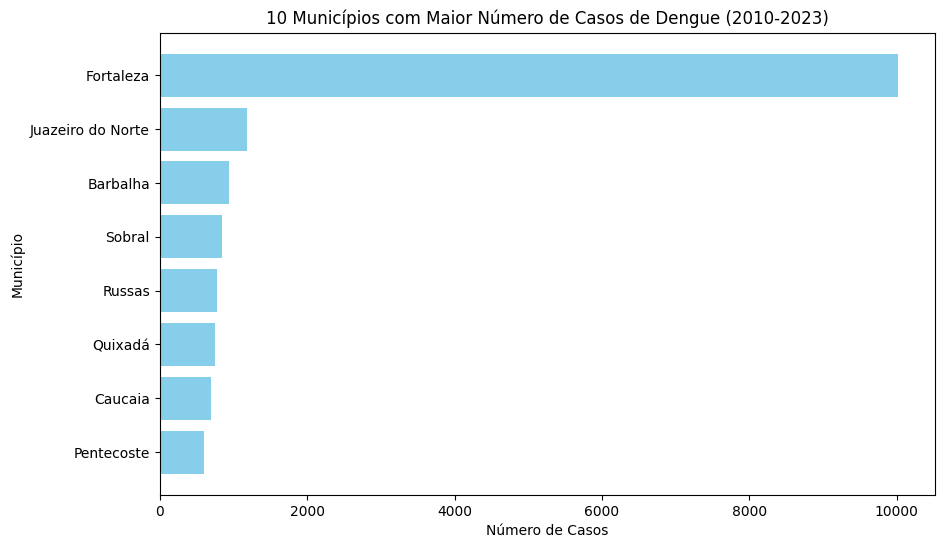

In [9]:
# Encontrar o município com o maior número de casos em cada ano.
max_cases_df = df_combined[df_combined['ano_notif'].between(2010, 2023)]  # Filtra para os anos desejados
max_cases_df = max_cases_df.groupby(['ano_notif', 'geocodigo'])['casos_notif'].max().reset_index()
max_cases_df = max_cases_df.sort_values(by=['casos_notif'], ascending=False)

# Selecionar apenas os 10 municípios com mais casos.
top_10_municipios = max_cases_df.head(20)

# Obter os nomes dos municípios correspondentes.
top_10_municipios = top_10_municipios.merge(df_combined[['geocodigo', 'nome_municipio']], on='geocodigo', how='left')

# Criar o gráfico de barras horizontais.
plt.figure(figsize=(10, 6))
plt.barh(top_10_municipios['nome_municipio'], top_10_municipios['casos_notif'], color='skyblue')
plt.xlabel('Número de Casos')
plt.ylabel('Município')
plt.title('10 Municípios com Maior Número de Casos de Dengue (2010-2023)')
plt.gca().invert_yaxis()  # Inverte o eixo y para que o maior número de casos fique no topo
plt.show()


 ## Train and Test

 
 Criar um modelo que possa aprender a relação entre as características de entrada (X) e os valores de destino (y).

In [10]:
# Selecionar as colunas relevantes para o modelo
cols = ['ano_notif', 'se_notif', 'casos_notif', 'temp_med', 'umid_med']

# Agregar os dados novamente
df_vis = df_combined[cols].groupby(['ano_notif', 'se_notif']).agg(
    casos_notif=('casos_notif', 'sum'),
    temp_med=('temp_med', 'mean'),
    umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])

print(df_vis)

     ano_notif  se_notif  casos_notif   temp_med   umid_med
719       2023        40          125  28.216671  59.186954
718       2023        39          254  28.430922  58.586696
717       2023        38          342  28.307549  58.435867
716       2023        37          394  27.851189  58.441213
715       2023        36          423  27.976227  57.195128
..         ...       ...          ...        ...        ...
4         2010         5          526  27.974113  69.519293
3         2010         4          362  26.933492  75.413768
2         2010         3          396  27.352789  73.381867
1         2010         2          280  27.204826  73.322146
0         2010         1          244  26.647182  73.675757

[720 rows x 5 columns]


In [11]:
# Criar os conjuntos de treinamento e teste
X = df_vis[['se_notif', 'ano_notif', 'temp_med', 'umid_med']]
y = df_vis['casos_notif']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo RandomForest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Avaliação do Modelo

### Importância de cada recruso
**feature_importances_** fornece informações sobre a importância relativa de cada recurso (ou variável) no processo de tomada de decisão do modelo. É uma métrica útil para entender quais recursos estão contribuindo mais para a capacidade preditiva do modelo.

 Características com importância muito baixa podem ser excluídas do modelo para simplificá-lo, reduzir o overfitting e acelerar o treinamento.

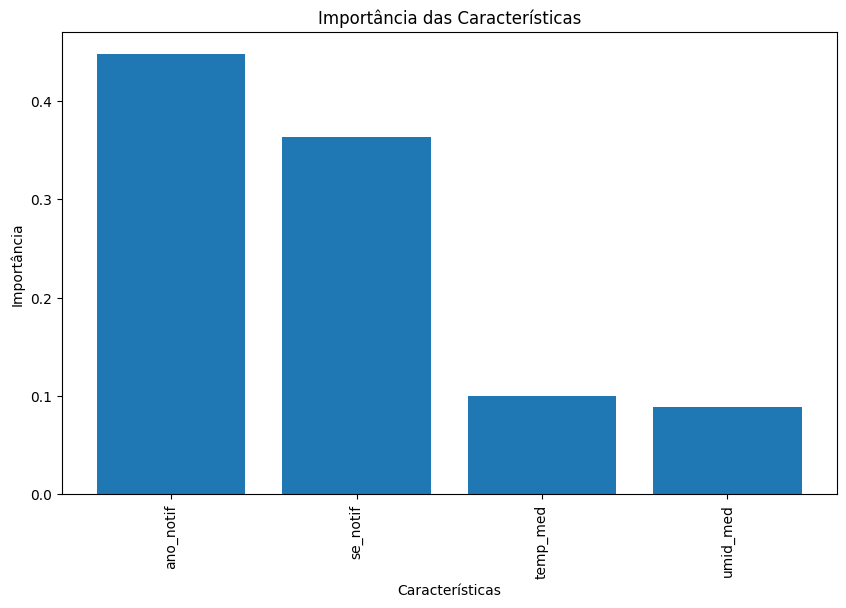

In [12]:
# Obter a importância das características do modelo
feature_importances = regressor.feature_importances_

# Obter as colunas de características
feature_names = X_train.columns

# Classificar as características por importância
indices = feature_importances.argsort()[::-1]

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()


Nesta fase, o objetivo principal é medir o desempenho do modelo e determinar quão bem ele está funcionando

In [13]:
#####
# Fazer previsões com o modelo nos dados de teste
y_pred = regressor.predict(X_test)

# Calcule o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcule o R-squared
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')



RMSE: 1131.4160725351978
R-squared: 0.8868191211237809


RMSE (Root Mean Square Error): O RMSE é uma métrica que mede a média dos erros quadrados entre as previsões do modelo e os valores reais. Ele fornece uma medida da dispersão dos erros. Quanto menor o valor do RMSE, melhor o modelo está em ajustar-se aos dados.

R-squared (R²): O R-squared, também conhecido como coeficiente de determinação, é uma métrica que varia de 0 a 1. Ele representa a proporção da variabilidade nos dados que é explicada pelo modelo. Um valor de R² próximo de 1 indica que o modelo explica uma grande parte da variabilidade nos dados, enquanto um valor próximo de 0 significa que o modelo não explica bem os dados. 

O RMSE relativamente baixo e o alto R² sugerem que o modelo está fazendo boas previsões e explicando uma grande parte da variabilidade nos dados. 

In [14]:
# Criar um DataFrame com as semanas epidemiológicas de 2018 a 2023
years = [2018] * 52 + [2019] * 52 + [2020] * 53 + [2021] * 52 + [2022] * 52 + [2023] * 52
weeks = list(range(1, 53)) * 6

# Garantir que as listas tenham o mesmo comprimento
if len(years) > len(weeks):
    years = years[:len(weeks)]
elif len(weeks) > len(years):
    weeks = weeks[:len(years)]

# Criar o dataframe com as mesmas características (features) que foram usadas durante o treinamento, 
weeks_2018_2023 = pd.DataFrame({'se_notif': weeks, 'ano_notif': years, 'temp_med': 0, 'umid_med': 0 })

# Prever os casos estimados para 2018 a 2023
y_pred_2018_2023 = regressor.predict(weeks_2018_2023)
weeks_2018_2023['casos_pred'] = y_pred_2018_2023

# Filtrar os casos notificados entre 2018 e 2023
casos_notif_2018_2023 = df_vis[df_vis['ano_notif'].between(2018, 2023)]

# Selecionar colunas relevantes para o dataframe com os casos estimados: weeks_2018_2023
cols =["se_notif",  "ano_notif",  "casos_pred"]

# Mesclar os DataFrames de casos estimados e notificados
merged_2018_2023 = pd.merge(weeks_2018_2023[cols], casos_notif_2018_2023, on=['ano_notif', 'se_notif'], how='left')

print(merged_2018_2023)

     se_notif  ano_notif  casos_pred  casos_notif   temp_med   umid_med
0           1       2018     1137.94       1100.0  28.407637  67.189584
1           2       2018     1173.21       1426.0  27.237165  70.747005
2           3       2018     1192.53       1504.0  28.302791  63.800663
3           4       2018     1324.77       1498.0  26.986699  76.502849
4           5       2018     1402.37       1482.0  27.165810  76.459974
..        ...        ...         ...          ...        ...        ...
307        48       2023      745.86          NaN        NaN        NaN
308        49       2023      703.38          NaN        NaN        NaN
309        50       2023      682.98          NaN        NaN        NaN
310        51       2023      674.03          NaN        NaN        NaN
311        52       2023      665.75          NaN        NaN        NaN

[312 rows x 6 columns]


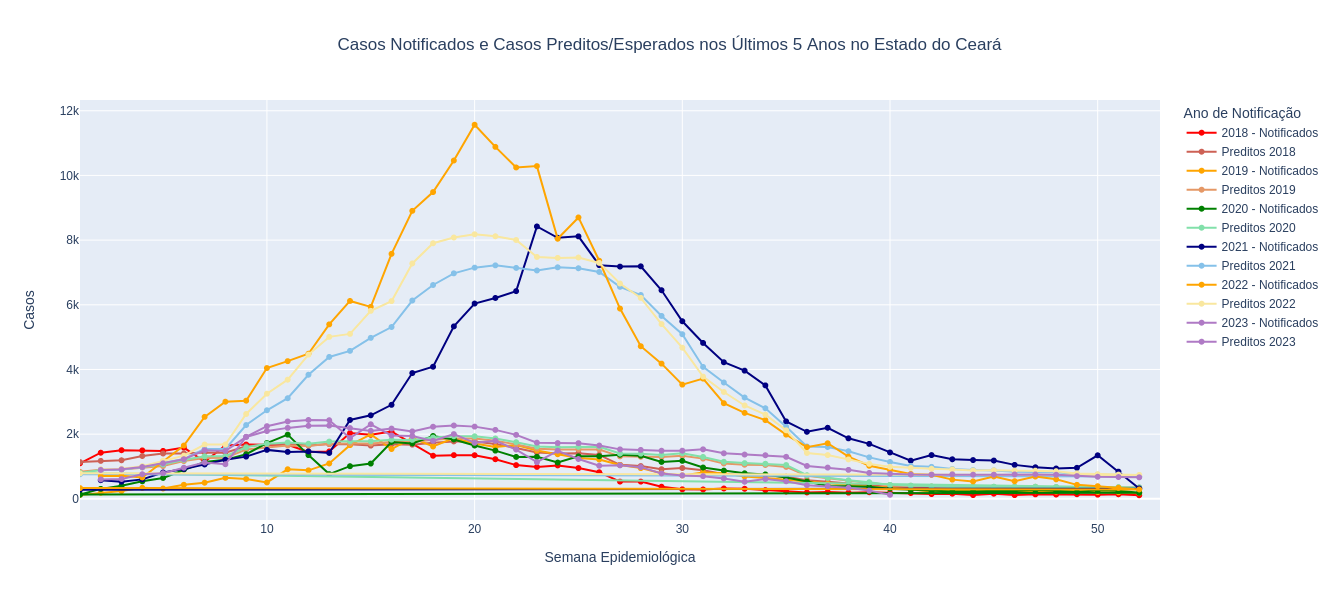

In [15]:
# Mapear as cores para os anos e os casos estimados
colors = {
    2018: 'rgba(255, 0, 0, 1)',  # Vermelho forte
    'Estimados 2018': 'rgb(205, 97, 85)',  # Vermelho fraco
    2019: 'rgba(255, 165, 0, 1)',  # Laranja forte
    'Estimados 2019': 'rgb(229, 152, 102)',  # Laranja fraco
    2020: 'rgba(0, 128, 0, 1)',  # Verde forte
    'Estimados 2020': 'rgb(130, 224, 170)',  # Verde fraco
    2021: 'rgba(0, 0, 128, 1)',  # Azul forte
    'Estimados 2021': 'rgb(133, 193, 233)',  # Azul fraco
    2022: 'rgba(255, 165, 0, 1)',  # Amarelo forte
    'Estimados 2022': 'rgb(249, 231, 159)',  # Amarelo fraco
    2023: 'rgba(175, 122, 197, 1)',  # Marrom forte
    'Estimados 2023': 'rgb(175, 122, 197)'  # Marrom fraco
}

fig = go.Figure()

# Adicionar as linhas para casos notificados e estimados
for ano in [2018, 2019, 2020, 2021, 2022, 2023]:
    df_ano = merged_2018_2023[merged_2018_2023['ano_notif'] == ano]
    fig.add_trace(go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_notif'], mode='lines+markers',
                             name=str(ano) + ' - Notificados', line=dict(color=colors[ano]),
                             text=df_ano["ano_notif"],
                             customdata=df_ano['se_notif'],
                             hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Notificados: %{y}'"<extra></extra>"))
    fig.add_trace(go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_pred'].astype(int), mode='lines+markers',
                             name='Preditos ' + str(ano), line=dict(color=colors['Estimados ' + str(ano)]),
                             text=df_ano["ano_notif"],
                             customdata=df_ano['se_notif'],
                             hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Estimados: %{y}'"<extra></extra>"))

# Personalizar o layout do gráfico
fig.update_layout(xaxis_title='Semana Epidemiológica', yaxis_title='Casos',
                  title_text="Casos Notificados e Casos Preditos/Esperados nos Últimos 5 Anos no Estado do Ceará",
                  title_x=0.5,
                  hovermode="x",
                  xaxis=dict(range=[1, 53]),  # Define o limite mínimo do eixo x
                  autosize=False,
                  height=600,
                  width=1280,
                  legend_title_text='Ano de Notificação')

# Plotar o gráfico interativo
fig.show()
